# Review of Python Constructs (2/22)

This documents summarizes the Python constructs learnt in class so far, including all commands that might be covered in Exam 1. See the [list of Python constructs potentially covered in Exam 1 here](http://nbviewer.jupyter.org/github/pengshi-usc/usc-dso-570/blob/master/Supplementary/Exam%201%20Format.ipynb). 

## Assignment
```python
x=5 # single variable assignment
x,y=(3,5) # multiple assignment from tuple
x,y,z=[1,2,3] # multiple assignment from list

def f():
    return 1,2,3
x,y,z=f()  # multiple assignment from function return
```

**Scope of variables:**
Variables created inside a function can only be accessed inside the function but not outside. Functions created outside the function, if not overwritten by the function, can also be accessed inside the function. In the following example, the variable `s` created inside the function is accessible only inside the function, but not outside. Similar statement holds for the input argument `x` to the function. However, the variable `y` created outside the function is also accessible inside the function, because it is neither an input argument to `f` nor a local variable created in `f`.

In [4]:
x=5
y=10
l=5
s=None
def f(x):
    s=x+l
    print('Inside f: x={0}, y={1}, s={2}'.format(x,y,s))
    return 2*x
f(1)
print('Outside f: x={0}, y={1}, s={2}'.format(x,y,s))

Inside f: x=1, y=10, s=6
Outside f: x=5, y=10, s=None


## Conditional statements
The following code illustrates the use of conditionals in Python. The code sets variable `ans` based on the sign of variable `x`.
```python
if x>0:
    ans='Positive'
elif x<0:
    ans='Negative'
else:
    ans='Zero'
```

## For loops
The following code illustrate the syntax of a for loop.

In [5]:
for i in [1,3,5]:
    print(i)

1
3
5


The above example iterates through a `list`. You can also iterate through any iterable object, including `range`, `set`, `dict`, `numpy.ndarray`, `pandas.Series`, `pandas.DataFrame`. For sets and dictionaries, the iteration is through the keys in no particular order. For numpy arrays, the iteration is through the first dimension (which is iterating through rows if 2-D array is used). For DataFrame, the iteration is through the column indices. 

The command `break` exits the current loop. The command `continue` skips the current iteration. See example below.

In [19]:
for i in range(10):
    if i==2:
        continue
    if i==6:
        break
    print(i)

0
1
3
4
5


## Strings

We can print a string to screen using the `print` command. The format is `print(s)` where `s` is a `str` type object.

It is useful to format the string, as follows



In [20]:
x=1
y=2
print('y={1}, x={0}'.format(x,y))

y=2, x=1


Notice that `{0}` is a place holder for the first argument of format, which is `x`, and `{1}` is a place holder for the second one.

For decimal numbers, you can specify how to display it using the following notation. Here, `f` stands for leaving it as float, `%` stands for converting it to percentages. And `.2` or `.1` specifies how many decimal places.

In [26]:
x=1.133
y=1.244
print('x={0:.2f} converted to int={0:.1%}'.format(x,y))

x=1.13 converted to int=113.3%


We can split a string by a substring, or join a list of strings by a substring as follows.

In [28]:
l='A B C'.split(' ')
print(l)
print('-'.join(l))

['A', 'B', 'C']
A-B-C


## Lists

The following code illustrates the syntax of operations with lists.

In [228]:
l=[1,4,[1, 3],4,5] # Defining
print('l=',l)
print('len(l)=',len(l))
print('l[2]=',l[2])     # Indexing
print('l[2][0]=',l[2][0])     # Indexing
print('l[-1]=',l[-1])
print('l[1:4]=',l[1:4]) # Slicing
print('l[:-1]=',l[:-1]) # Slicing
l.append('6')
print("After appending '6', l=",l)
print('l.index(4)=',l.index(4)) # Search through the list for 4 (returns first found)
print('l.index([1,3])=',l.index([1,3]))  # Search through the list for [1,6]

l= [1, 4, [1, 3], 4, 5]
len(l)= 5
l[2]= [1, 3]
l[2][0]= 1
l[-1]= 5
l[1:4]= [4, [1, 3], 4]
l[:-1]= [1, 4, [1, 3], 4]
After appending '6', l= [1, 4, [1, 3], 4, 5, '6']
l.index(4)= 1
l.index([1,3])= 2


We can create a list by list comprehension as below. 

Instead of the for loop
```python
l=[]
for ind in range(5):
    l.append(ind*ind)
```

We can do everything in one line.
```python
l=[ind*ind for ind in range(5)]
```


## Range-like lists
Instead of explicitly defining the list of elements to iterate through, we can use `range`, where `range(5)` is the same as `[0,1,2,3,4]`, `range(2,5)` is the same as `[2,3,4]`, and `range(2,10,2)` is the same as `[2,4,6,8]`. 

The format for `range` is `range(beg,stop,skip)`, where `beg` is where to begin, `stop` is where to stop (range stops before this value), and `skip` is how many values to skip each time. Instead of specifying 3 input arguments, one can also do the following shorthands.

| Shorthand | Equivalent to |
|---|---|
|`range(n)` | `range(0,n,1)`|
|`range(m,n)` | `range(m,n,1)`|

All inputs to `range` must be integers.


In [12]:
print(list(range(5)))
print(list(range(2,5)))
print(list(range(2,10,2)))
print(list(range(5,2,-1)))

[0, 1, 2, 3, 4]
[2, 3, 4]
[2, 4, 6, 8]
[5, 4, 3]


On the other hand, `np.arange` allows for fractions. Moreover, the returned values are `numpy.ndarray` objects rather than `range` objects. Otherwise, the format is similar to the above.

In [13]:
import numpy as np
print(np.arange(5))
print(np.arange(2.1,5.5))
print(np.arange(2.2,10.2,2))
print(np.arange(5.2,2.2,-1))

[0 1 2 3 4]
[ 2.1  3.1  4.1  5.1]
[ 2.2  4.2  6.2  8.2]
[ 5.2  4.2  3.2]


**`np.linspace`**

An alternative to `np.arange` is `np.linspace`, in which instead of specifying skip size, we specify the first number, the last number, and how many points to have in the middle. See the following examples.

In [14]:
print(np.linspace(1,5,4))
print(np.linspace(1,0,5))

[ 1.          2.33333333  3.66666667  5.        ]
[ 1.    0.75  0.5   0.25  0.  ]


## Sets and Dictionaries

Sets and dictionaries are not in Exam 1 but it is good to review anyway.

Both sets and dictionaries have unique keys and can be explicitly created by curly braces. Moreover, neither of them preserve the order of elements.
```python
s={3,1,5}
d={3:'3',1:'1',5:'5'}
```
The difference is that dictionary also maps each of the unique keys to a value. See syntax of common operations below.

In [215]:
# Sets
s={3,1,5}
print(s)
print('len(s)=',len(s))
s.add(4)    # Adding to set
print(s)
s.remove(4)  # Removing from set
print(s)   

for e in s:  # Iterating through set
    print(e)
print (5 in s) # checking membership
print(8 in s)

s2={5,6,8}
print('Union of s and s2',s|s2)
print('Intersection of s and s2',s & s2)

print('set([3,1,1,1,5])=',set([3,1,1,1,5])) # Converting from list

{1, 3, 5}
{1, 3, 4, 5}
{1, 3, 5}
1
3
5
True
False
Union of s and s2 {1, 3, 5, 6, 8}
Intersection of s and s2 {5}
set([3,1,1,1,5])= {1, 3, 5}


In [229]:
# Dictionaries
d={3:'S3',1:'S1',5:'S5'}
print(d)
print('len(d)=',len(d))
d[4]='S4'  # Adding (key,value) pair
print(d)
del d[4]  # Removing key 
print(d)

for e in d:  # Iterating through keys
    print('Key {0} maps to value {1}'.format(e,d[e]))
print (5 in d) # checking membership
print(8 in d)

# Converting from list of tuples
print("dict([(3,'3'),(1,'1'),(5,'5')])=",dict([(3,'3'),(1,'1'),(5,'5')])) 

{3: 'S3', 1: 'S1', 5: 'S5'}
len(d)= 3
{3: 'S3', 1: 'S1', 5: 'S5', 4: 'S4'}
{3: 'S3', 1: 'S1', 5: 'S5'}
Key 3 maps to value S3
Key 1 maps to value S1
Key 5 maps to value S5
True
False
dict([(3,'3'),(1,'1'),(5,'5')])= {3: '3', 1: '1', 5: '5'}


## Functions

Functions are defined using the syntax as below.

```python
def func(x,y=2,z=5):
    ''' Documentation for readers 
    This function adds the three inputs and returns the sum.'''
    s=x+y+z
    return s
```

This code creates the object `func` with type `function`. Based on this code, the function can take 3 inputs, with the first input `x` mandatory and the second two inputs `y` and `z` optional. The default setting of those inputs are given by the equal signs. This function returns the object `s` which is created inside the function and is equal to the sum of the three inputs. 

We can specify a single line comment by `#`, and a multiple line comment by enclosing with `'''`. The above multi-line comment after the function definition is called the "docstring", and it is what is displayed when user looks up the function on `help`.

In [141]:
def func(x,y=2,z=5):
    ''' Documentation for readers 
    This function adds the three inputs and returns the sum.'''
    s=x+y+z
    return s

print(func(1))
print(func(1,3))
print(func(1,3,6))
print(func(1,z=4))
help(func)

8
9
10
7
Help on function func in module __main__:

func(x, y=2, z=5)
    Documentation for readers 
    This function adds the three inputs and returns the sum.



## Distributions
Following are examples of declaring various distributions and calling it X.

```python
from scipy.stats import norm,uniform,binom,geom,poisson,expon
X=bernoulli(p=0.5)        # Bernoulli with p=0.5 (coin flip)
X=norm(loc=100,scale=30)    # Mean 100, St. Dev. 30
X=uniform(loc=10,scale=30)  # Uniform between 10 and 10+30=40
X=binom(n=100,p=0.5)     # Binomial with n=100, p=0.5
X=geom(p=0.3)       # Geometric with p=0.3
X=poisson(mu=10)    # Poisson with mean 10
X=expon(scale=30)   # Exponential with mean 30
```

Given any of the above, we can calculate the mean, standard deviation, variance as below.

In [171]:
from scipy.stats import norm
X=norm(loc=100,scale=30)    # Mean 100, St. Dev. 30
print('mean',X.mean())
print('std',X.std())
print('var',X.var())

mean 100.0
std 30.0
var 900.0


For continuous distributions, we can compute the CDF and PDF as below, for any given array of values.

In [176]:
from scipy.stats import norm
print('Normal distribution with mean 100 and st. dev. 30')
X=norm(loc=100,scale=30)    
values=np.linspace(50,150,5)
print('values=',values)
print('X.cdf(values)=',X.cdf(values)) # Prob X is no more than each value
print('X.pdf(values)=',X.pdf(values)) # Derivative of CDF

Normal distribution with mean 100 and st. dev. 30
values= [  50.   75.  100.  125.  150.]
X.cdf(values)= [ 0.04779035  0.20232838  0.5         0.79767162  0.95220965]
X.pdf(values)= [ 0.0033159   0.00939706  0.01329808  0.00939706  0.0033159 ]


For discrete distributions, the CDF and PMF follow a similar syntax.

In [178]:
from scipy.stats import binom
print(' Binomial distribution with n=100, p=0.8')
X=binom(n=100,p=.8)    
values=np.arange(0,101,20)
print('values=',values)
print('X.cdf(values)=',X.cdf(values)) # Prob X is no more than each value
print('X.pmf(values)=',X.pmf(values)) # Prob X is equal to each value

 Binomial distribution with n=100, p=0.8
values= [  0  20  40  60  80 100]
X.cdf(values)= [  1.26765060e-70   7.95989864e-38   2.51581920e-18   3.60842011e-06
   5.39838630e-01   1.00000000e+00]
X.pmf(values)= [  1.26765060e-70   7.47051786e-38   2.10660425e-18   2.31623587e-06
   9.93002148e-02   2.03703598e-10]


For any of the above distributions, suppose the distribution is `X`, we can draw `n` samples using
```python
X.rvs(size=n)
```
This returns a 1-D array of `n` elements. We can also sample a multi-dimensional array of values by giving a tuple that specifies the desired shape. See example below.


In [186]:
from scipy.stats import bernoulli
np.random.seed(0)    # Set seed for consistent output
X=bernoulli(p=0.5)
print(X.rvs())       # Default is size=1
print(X.rvs(size=10))   # Sample 10 times
print(X.rvs(size=(2,5))) # Return samples in 2 rows of 5 columns each

1
[1 1 1 0 1 0 1 1 0 1]
[[1 1 1 0 0]
 [0 1 1 1 1]]


## Plotting

The `matplotlib.pyplot` package can be used for plotting. Commonly used commands are:

- `figure`: create a new figure (otherwise plots will be drawn together). Can specify figure size.
- `plot`: create a scatter or line plot
- `hist`: create a histogram
- `show`: show all plots created so far (default is not show)
- `title`: set the title of the plot
- `xlabel`: set the x-axis label
- `ylabel`: set the y-axis label
- `vlines`: create a set of vertical lines with given x, ymin, ymax values.
- `xlim`: set the limits of the x-axis shown.
- `ylim`: set the limits of the y-axis.
- `legend`: create a legend (each plot must have a `label` argument).
- `savefig`: save the figure to a file. Can use to specify file type and figure size.
- `close`: close figures (otherwise figure wastes memory)

See the following example for illustration

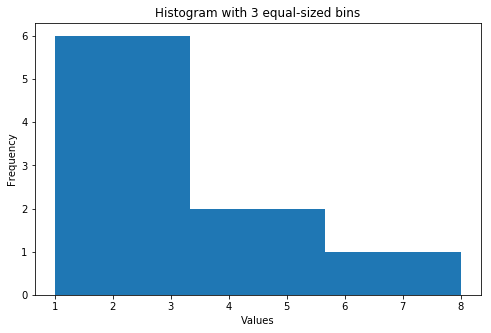

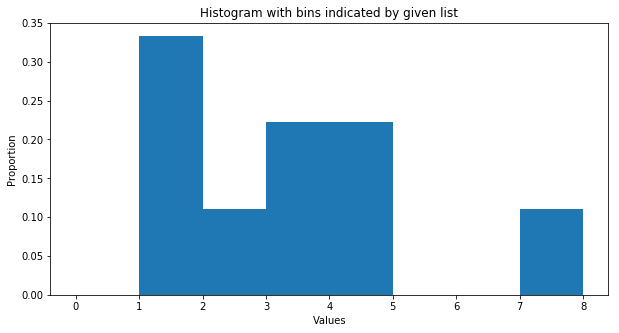

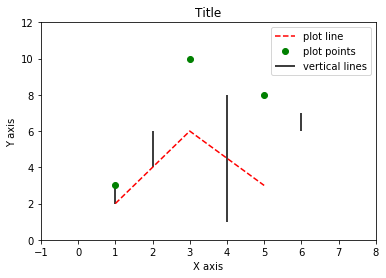

In [201]:
import matplotlib.pyplot as plt
values=[1,1,3,4,2,1,3,4,8]
plt.figure(figsize=(8,5))
plt.hist(values,bins=3)
plt.title('Histogram with 3 equal-sized bins')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.savefig('hist1.png')

plt.figure(figsize=(10,5))
plt.hist(values,bins=[0,1,2,3,4,5,6,7,8],density=True)
plt.title('Histogram with bins indicated by given list')
plt.xlabel('Values')
plt.ylabel('Proportion')
plt.savefig('hist1.pdf')

plt.figure()
# In plot, the first argument specifies the x, and the second the y
plt.plot([1,3,5],[2,6,3],'r--',label='plot line')
plt.plot([1,3,5],[3,10,8],'go', label='plot points')
# In vlines, the first argument gives x, the second the ymin, the third the ymax.
plt.vlines([1,2,4,6],[2,4,1,6],[3,6,8,7],label='vertical lines')
plt.legend()
plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim((-1,8))
plt.ylim((0,12))
plt.savefig('plot.png',figsize=(10,5))
plt.show()

## Numpy Arrays

The `numpy` module implements the object type `numpy.ndarray`. A 1-dimensional array is like a list. A 2-dimensional array is like a table. The benefit of arrays over lists it that we can do operations on the whole array at once, instead of going through each element one at a time as with a list. This is called "vectorized" operations, and it makes the code shorter to write and faster to run. All `scipy` and `numpy` functions deal with arrays rather than lists. `DataFrame` and `Series` from the `pandas` module is also built on numpy arrays.

The following code illustrates the common numpy array operations. Read the comments for explanation of each line, as well as the print outputs to see what's the result.


In [106]:
# Importing the numpy package
import numpy as np

# Creating arrays.
print('-----Creating numpy arrays-----------------  Read comments above')
X=np.zeros(5)               # a list of 5 zeros. 
Y=np.ones((2,3))            # 2 rows and 3 columns of ones.
Z=np.array([[1,2,3],[4,5,6]])  # 2 rows of numbers, with given number
J=np.array([1,0,0,1])       # A list of 4 numbers.

K=np.arange(2,13,2)        # Similar to range, except for numpy arrays. 
L=np.linspace(1,10,7)     # 7 points that interpolate between 1 and 10.
print('X={0}\n Y={1}\n Z={2}\n K={3}\n L={4}'.format(X,Y,Z,K,L))
print('X.shape={0} \t Y.shape={1} '.format(X.shape,Y.shape)) 
# Accessing the shape of the array


-----Creating numpy arrays-----------------  Read comments above
X=[ 0.  0.  0.  0.  0.]
 Y=[[ 1.  1.  1.]
 [ 1.  1.  1.]]
 Z=[[1 2 3]
 [4 5 6]]
 K=[ 2  4  6  8 10 12]
 L=[  1.    2.5   4.    5.5   7.    8.5  10. ]
X.shape=(5,) 	 Y.shape=(2, 3) 


In [148]:
# Indexing
print('\n------Indexing------------------------- Read comments above')
print('Z=\n',Z)
print('K=\n',K)
print('Z[0,1]=',Z[0,1])       # Element in 0th row and 1st column
print('K[2]=',K[2])           # 3rd element
print('Z[1,:]=',Z[1,:])           # The second row
print('Z[:,1]=',Z[:,1])       # The second column
print('J=',J)
print('Z[J,:]=',Z[J,:])       # access the given rows. This is called fancy indexing.
print('Z[:,J]=',Z[:,J])       # access the given columns. Fancy indexing.
print('K[:2]=',K[:2])         # Everything before the 3rd element.
print('K[2:]=',K[2:])          # Everything since the 3rd element.
print('K[1:3]=',K[1:3])          # From the 2nd up to before the 4th element.
print('Z[:,:2]=\n',Z[:,:2])      # all rows and everything up to 3rd column

# Give only the first two and last two elements. 
print('K[[True,True,False,False,True,True]]=',K[[True,True,False,False,True,True]]) 

Z2=np.copy(Z)  # Make a copy of Z so we don't change it
print('Z2=\n',Z2)
Z2[0,:]=3      # Assign a value to the slice of Z2
print('Z2[0,:]=3\nZ2=\n',Z2)  # Print what Z2 looks like after assignment



------Indexing------------------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
K=
 [ 2  4  6  8 10 12]
Z[0,1]= 2
K[2]= 6
Z[1,:]= [4 5 6]
Z[:,1]= [2 5]
J= [1 0 0 1]
Z[J,:]= [[4 5 6]
 [1 2 3]
 [1 2 3]
 [4 5 6]]
Z[:,J]= [[2 1 1 2]
 [5 4 4 5]]
K[:2]= [2 4]
K[2:]= [ 6  8 10 12]
K[1:3]= [4 6]
Z[:,:2]=
 [[1 2]
 [4 5]]
K[[True,True,False,False,True,True]]= [ 2  4 10 12]
Z2=
 [[1 2 3]
 [4 5 6]]
Z2[0,:]=3
Z2=
 [[3 3 3]
 [4 5 6]]


In [232]:
# Element wise operation
print('\n----Element wise operations---------------- Read comments above')
print('Z=\n',Z)
print('Y=\n',Y)
print('Z+Y=\n',Z+Y) # Add the two arrays element wise. Note equal shapes of arrays.
print('Z-Y=\n',Z-Y)
print('Z*2=\n',Z*2)
print('Z/2=\n',Z/2)
print('Z/Z=\n',Z/Z) # Divide each element of Z by each element of Z.
print('Z>3=\n',Z>3) # Create True/False array of whether each element >= 3

# Create True/False array for element being at least 3 AND no more than 5.
print('(Z>=3)&(Z<=5)=\n',(Z>=3)&(Z<=5))

# Create True/False array for element less than 3 OR bigger than 5
print('(Z<3)|(Z>5)=\n',(Z<3)|(Z>5)) 

print('-Z=\n',-Z)   # Negate each element
print('np.sqrt(Z)=\n',np.sqrt(Z)) # square root
print('np.power(Z)=\n',np.power(Z,2)) # 2nd power (i.e. square)
print('np.log(Z)=\n',np.log(Z)) # natual log
print('Z-3=\n',Z-3) 
print('np.abs(Z-3)=\n',np.abs(Z-3)) # Absolute value

# Flatten the array into 1-D and compute array of running totals
print('np.cumsum(Z)=',np.cumsum(Z)) 


----Element wise operations---------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
Y=
 [[ 1.  1.  1.]
 [ 1.  1.  1.]]
Z+Y=
 [[ 2.  3.  4.]
 [ 5.  6.  7.]]
Z-Y=
 [[ 0.  1.  2.]
 [ 3.  4.  5.]]
Z*2=
 [[ 2  4  6]
 [ 8 10 12]]
Z/2=
 [[ 0.5  1.   1.5]
 [ 2.   2.5  3. ]]
Z/Z=
 [[ 1.  1.  1.]
 [ 1.  1.  1.]]
Z>3=
 [[False False False]
 [ True  True  True]]
(Z>=3)&(Z<=5)=
 [[False False  True]
 [ True  True False]]
(Z<3)|(Z>5)=
 [[ True  True False]
 [False False  True]]
-Z=
 [[-1 -2 -3]
 [-4 -5 -6]]
np.sqrt(Z)=
 [[ 1.          1.41421356  1.73205081]
 [ 2.          2.23606798  2.44948974]]
np.power(Z)=
 [[ 1  4  9]
 [16 25 36]]
np.log(Z)=
 [[ 0.          0.69314718  1.09861229]
 [ 1.38629436  1.60943791  1.79175947]]
Z-3=
 [[-2 -1  0]
 [ 1  2  3]]
np.abs(Z-3)=
 [[2 1 0]
 [1 2 3]]
np.cumsum(Z)= [ 1  3  6 10 15 21]


In [158]:
# Simple statistics
print('\n-----Simple Statistics--------------------- Read comments above')
print('Z=\n',Z)
print('np.sum(Z)=',np.sum(Z))       # Total of elements
print('np.sum(Z,axis=0)=',np.sum(Z,axis=0)) # Summing rows for each column
print('np.sum(Z,axis=1)=',np.sum(Z,axis=1)) # Summing columns for each row
print('np.average(Z)=',np.average(Z))  # Average of elements
print('np.std(Z)=',np.std(Z))        # Standard deviation of elements
print('np.sum(Z>3)=',np.sum(Z>3))   # Count number of elements greater than 3.

# Count number of elements between 2 and 5
print('np.sum((Z>=2)&(Z<=5))=',np.sum((Z>=2)&(Z<=5)))   

# Count number of elements less than 2 or bigger than 5
print('np.sum((Z<2)|(Z>5))=',np.sum((Z<=2)|(Z>5)))   



-----Simple Statistics--------------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
np.sum(Z)= 21
np.sum(Z,axis=0)= [5 7 9]
np.sum(Z,axis=1)= [ 6 15]
np.average(Z)= 3.5
np.std(Z)= 1.70782512766
np.sum(Z>3)= 3
np.sum((Z>=2)&(Z<=5))= 4
np.sum((Z<2)|(Z>5))= 3


In [104]:
# Manipulating
print('\n-----Manipulating--------------------- Read comments above')
print('Z=\n',Z)
print('Z.T=\n',Z.T) # Transpose
X=np.copy(Z)    # Create a copy of Z, so that X and Z can be changed independently
# Find the index of rows and columns satisfying the given condition X>=3.
print('np.where(X>=3)=',np.where(X>=3)) 
X[np.where(X>=3)]=3 # Set where X is larger or equal to 3 to 3.
print('X=np.copy(Z); X[np.where(X>=3)]=3')
print('X=\n',X)
print('np.hstack((Z,X))=\n',np.hstack((Z,X)))  # Horizontally stack two arrays.
print('np.vstack((Z,X))=\n',np.vstack((Z,X)))  # Vertically stack two arrays.
print('K=',K)
print('K.reshape((3,2))=\n',K.reshape((3,2))) # Reshape the array.
print('Z.shape=',Z.shape)



-----Manipulating--------------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
Z.T=
 [[1 4]
 [2 5]
 [3 6]]
np.where(X>=3)= (array([0, 1, 1, 1], dtype=int64), array([2, 0, 1, 2], dtype=int64))
X=np.copy(Z); X[np.where(X>=3)]=3
X=
 [[1 2 3]
 [3 3 3]]
np.hstack((Z,X))=
 [[1 2 3 1 2 3]
 [4 5 6 3 3 3]]
np.vstack((Z,X))=
 [[1 2 3]
 [4 5 6]
 [1 2 3]
 [3 3 3]]
K= [ 2  4  6  8 10 12]
K.reshape((3,2))=
 [[ 2  4]
 [ 6  8]
 [10 12]]
Z.shape= (2, 3)


In [126]:
# Iterating
print('\n------Iterating------------- Read comments above')
print('Z=\n',Z)
print('Iterating through rows of Z')
for row in Z:
    print(row)
print('Iterating through rows of Z.T')
for row in Z.T:    # Same as iterating through the columns
    print(row)


------Iterating------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
Iterating through rows of Z
[1 2 3]
[4 5 6]
Iterating through rows of Z.T
[1 4]
[2 5]
[3 6]


In [160]:
# Sorting
print('\n------Sorting------------- Read comments above')
L=np.array([[6,10,1,2],[5,8,10,3]])
print('L=\n',L)

# Return an array that sorts each row of L (does not change L)
print('np.sort(L)=\n',np.sort(L))   

# Return an array that sorts each column of L (does not change L)
print('np.sort(L,axis=0)=\n',np.sort(L,axis=0))   

# Return the column indices of each row of L in increasing order.
print('np.argsort(L)=\n',np.argsort(L))          

# Return the row indices of each column of L in increasing order.
print('np.argsort(L,axis=0)=\n',np.argsort(L,axis=0))          

# Sort columns of L by row 0
print('L[:,L[0].argsort()]=\n',L[:,L[0].argsort()]) 

# Sort rows of L by column 0
print('L[L[:,0].argsort(),:]=\n',L[L[:,0].argsort(),:]) 


------Sorting------------- Read comments above
L=
 [[ 6 10  1  2]
 [ 5  8 10  3]]
np.sort(L)=
 [[ 1  2  6 10]
 [ 3  5  8 10]]
np.sort(L,axis=0)=
 [[ 5  8  1  2]
 [ 6 10 10  3]]
np.argsort(L)=
 [[2 3 0 1]
 [3 0 1 2]]
np.argsort(L,axis=0)=
 [[1 1 0 0]
 [0 0 1 1]]
L[:,L[0].argsort()]=
 [[ 1  2  6 10]
 [10  3  5  8]]
L[L[:,0].argsort(),:]=
 [[ 5  8 10  3]
 [ 6 10  1  2]]


In [230]:
# Optimization
print('\n------Optimization------------- Read comments above')

Z2=np.array([[3,2,5],[4,5,4]])
print('Z=\n',Z)
print('Z2=\n',Z2)
print('np.maximum(Z,3)=\n',np.maximum(Z,3)) # element wise maximum (contrast np.max)
print('np.minimum(Z,3)=\n',np.minimum(Z,3)) # element wise minimum (contrast np.min)
print('np.minimum(Z,Z2)=\n',np.minimum(Z,Z2)) # element wise minimum 
print('np.max(Z)=',np.max(Z))        # Maximum value of all elements
print('np.min(Z)=',np.min(Z))        # Maximum value of all elements

# Find for each column of Z2 the row index of the first element that is the largest.
print('np.argmax(Z2,axis=0)=',np.argmax(Z2,axis=0))  

# Find for each row of Z2 the column index of the first element that is the smallest.
print('np.argmin(Z2,axis=1)=',np.argmin(Z2,axis=1))

# Find the (row,column) indices where Z2 satisfies the given condition
# For example Z2[0,2]>=4, Z2[1,0]>=4, Z2[1,1]>=4, Z2[1,2]>=4
print('np.argwhere(Z2>=4)=\n',np.argwhere(Z2>=4))


------Optimization------------- Read comments above
Z=
 [[1 2 3]
 [4 5 6]]
Z2=
 [[3 2 5]
 [4 5 4]]
np.maximum(Z,3)=
 [[3 3 3]
 [4 5 6]]
np.minimum(Z,3)=
 [[1 2 3]
 [3 3 3]]
np.minimum(Z,Z2)=
 [[1 2 3]
 [4 5 4]]
np.max(Z)= 6
np.min(Z)= 1
np.argmax(Z2,axis=0)= [1 1 0]
np.argmin(Z2,axis=1)= [1 0]
np.argwhere(Z2>=4)=
 [[0 2]
 [1 0]
 [1 1]
 [1 2]]


In [122]:
# Saving and loading to file
a=np.array([[1,3,3],[5,4,5]])

# Saving the array to a CSV file, delimiter specifies comma separation
np.savetxt('arrayFile.csv',a,delimiter=',') 

# Load an array from a CSV file, delimiter specifies comma separation
b=np.loadtxt('arrayFile.csv',delimiter=',')

print ('a=\n',a)
print ('b= (after loading a saved csv file of a)\n',b)

a=
 [[1 3 3]
 [5 4 5]]
b= (after loading a saved csv file of a)
 [[ 1.  3.  3.]
 [ 5.  4.  5.]]


## Pandas

`pandas` is a package built on top of `numpy` arrays that makes dealing with data in table formats easier. It mimicks some of the functionality of R DataFrames and is the main Python workhorse for descriptive analytics. This course does not focus on `pandas` (as the focus is on prescriptive, rather than descriptive analytics) but we will make some use of it in the project.

The two data types in `pandas` are `Series` and `DataFrame`. `Series` operates like an 1-D array with labels for each element (so like a dictionary that keeps track of the order of keys). The labels are called "indices." `DataFrame` operations like a 2-D array with column and row labels. The row labels are also called "indices." Below code example illustrates how to define each object, read and write from data, and do simple operations on them.

In [273]:
import pandas as pd
s=pd.Series([3,4,5,6],index=['One','Two','Three','Four'])
print(s,'\n')  
print('type(s)=',type(s))
print('s.iloc[0]=',s.iloc[0])  # Indexing by row number
print("s.loc['Two']=",s.loc['Two']) # Indexing by row label
print()

print('s.iloc[2:4]=\n{0}\n'.format(s.iloc[2:4]))  # Slicing by row number
# Slicing by label
print("s.loc['Two':'Four']=\n{0}\n".format(s.loc['Two':'Four'])) 

print('s.as_matrix()=',s.as_matrix()) # Changing into 1-D numpy array

s.to_csv('Series.csv') # Save to a csv file.


One      3
Two      4
Three    5
Four     6
dtype: int64 

type(s)= <class 'pandas.core.series.Series'>
s.iloc[0]= 3
s.loc['Two']= 4

s.iloc[2:4]=
Three    5
Four     6
dtype: int64

s.loc['Two':'Four']=
Two      4
Three    5
Four     6
dtype: int64

s.as_matrix()= [3 4 5 6]


In [306]:
import pandas as pd
df=pd.DataFrame([[1,3,5],[4,2,6]],columns=['A','B','C'],index=['One','Two'])
print(df)
print('type(df)=',type(df),'\n')

df.info()
print('df.iloc[0,1]=',df.iloc[0,1]) # Indexing like an array
print('df.loc["One","B"]=',df.loc["One","B"]) # Indexing using labels

print('df.iloc[0,:]=\n{0}\n'.format(df.iloc[0,:])) # Slicing like an array
print('df.loc["One",:]=\n{0}\n'.format(df.loc["One",:])) # Slicing using labels
print("df['B']=\n{0}\n".format(df['B'])) # Accessing column
print("df.B=\n{0}\n".format(df['B'])) # Accessing column (equivalent to above)

print("df[df.B>=3]:")
print(df[df.B>=3],'\n')      # Filtering rows for which column B is at least 3

print("df.query('A>3'):")   # Another way of filtering
print(df.query('A>3'),'\n')

print('df.as_matrix()=\n',df.as_matrix()) # Change to numpy array

df.to_csv('dataframe.csv')              # Write to file
pd.read_csv('dataframe.csv',index_col=0) # Read from file

     A  B  C
One  1  3  5
Two  4  2  6
type(df)= <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, One to Two
Data columns (total 3 columns):
A    2 non-null int64
B    2 non-null int64
C    2 non-null int64
dtypes: int64(3)
memory usage: 64.0+ bytes
df.iloc[0,1]= 3
df.loc["One","B"]= 3
df.iloc[0,:]=
A    1
B    3
C    5
Name: One, dtype: int64

df.loc["One",:]=
A    1
B    3
C    5
Name: One, dtype: int64

df['B']=
One    3
Two    2
Name: B, dtype: int64

df.B=
One    3
Two    2
Name: B, dtype: int64

df[df.B>=3]:
     A  B  C
One  1  3  5 

df.query('A>3'):
     A  B  C
Two  4  2  6 

df.as_matrix()=
 [[1 3 5]
 [4 2 6]]


,A,B,C
One,1,3,5
Two,4,2,6
